In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
df=pd.read_csv('bs140513_032310.csv')

In [ ]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [ ]:
df.shape

(594643, 10)

In [ ]:
df.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [ ]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [ ]:
df['fraud'].value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

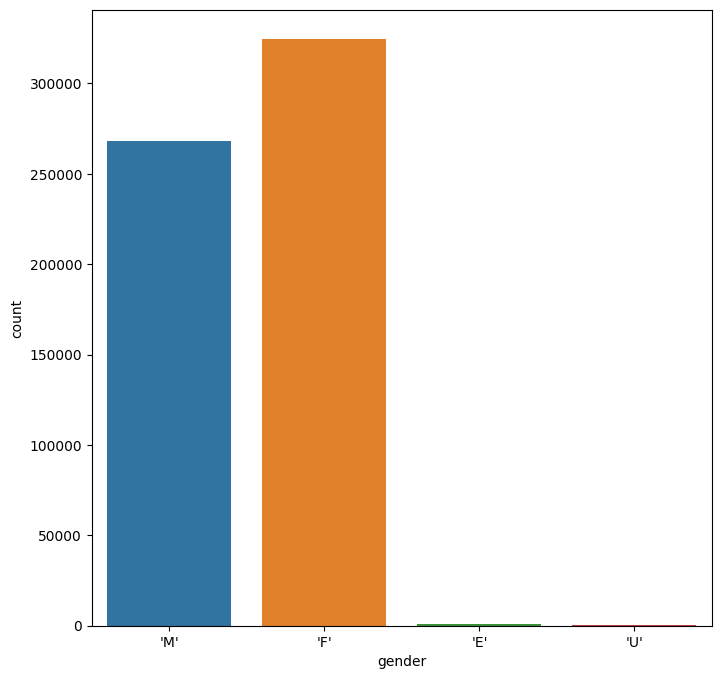

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x=df['gender'])

In [ ]:
df['gender'].value_counts()

'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: gender, dtype: int64

In [ ]:
df.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [ ]:
df_fraud = df.loc[df.fraud == 1]
df_non_fraud = df.loc[df.fraud == 0]

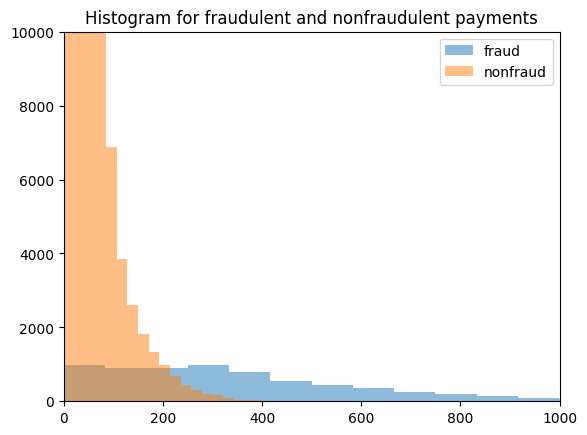

In [ ]:
plt.hist(df_fraud.amount, alpha=0.5, label='fraud',bins=100)
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud',bins=100)
plt.title("Histogram for fraudulent and nonfraudulent payments")
plt.ylim(0,10000)
plt.xlim(0,1000)
plt.legend()
plt.show()

In [ ]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [ ]:
column=df.columns
column

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [ ]:
for i in column:
  print(f'{i}:{df[i].unique()}')

step:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]
customer:["'C1093826151'" "'C352968107'" "'C2054744914'" ... "'C1014783484'"
 "'C849065220'" "'C1809646275'"]
age:["'4'" "'2'" "'3'" "'5'" "'1'" "'6'" "'U'" "'0'"]
gender:["'M'" "'F'" "'E'" "'U'"]
zipcodeOri:["'28007'"]
merchant:["'M348934600'" "'M1823072687'" "'M

In [ ]:
df['customer'] = df['customer'].str.replace("'", "")
df['age'] = df['age'].str.replace("'", "")
df['gender'] = df['gender'].str.replace("'", "")
df['zipcodeOri'] = df['zipcodeOri'].str.replace("'", "")
df['merchant'] = df['merchant'].str.replace("'", "")
df['zipMerchant'] = df['zipMerchant'].str.replace("'", "")
df['category'] = df['category'].str.replace("'", "")

In [ ]:
df['customer'].unique()

array(['C1093826151', 'C352968107', 'C2054744914', ..., 'C1014783484',
       'C849065220', 'C1809646275'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


<Axes: xlabel='fraud', ylabel='count'>

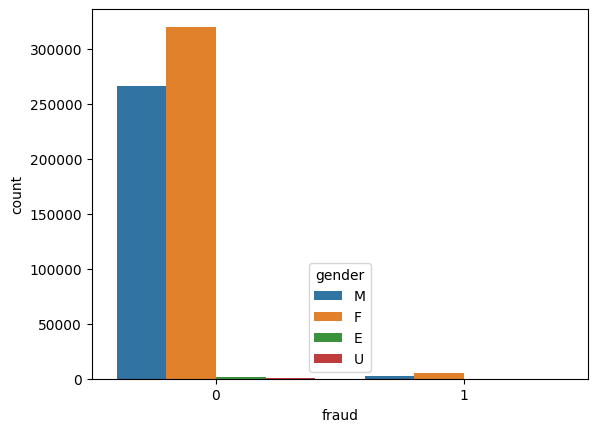

In [ ]:
sns.countplot(x=df['fraud'],hue=df['gender'])

<Axes: xlabel='fraud', ylabel='count'>

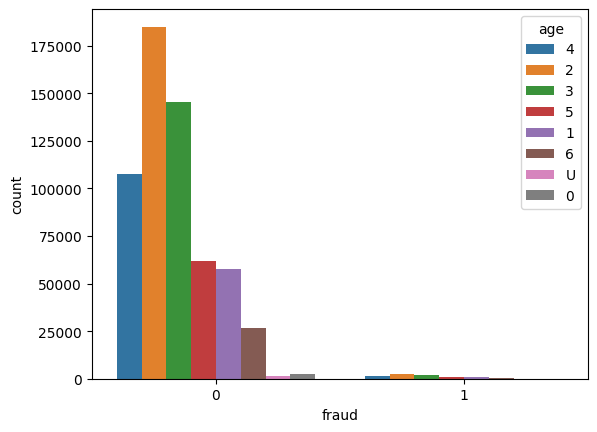

In [ ]:
sns.countplot(x=df['fraud'],hue=df['age'])

In [ ]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0


In [ ]:
df['zipcodeOri']=df['zipcodeOri'].astype(int)
df['zipMerchant']=df['zipMerchant'].astype(int)

In [ ]:
corr=df.corr()

C:\Users\USER\.dotnet\ANACONDA\lib\site-packages\seaborn\matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

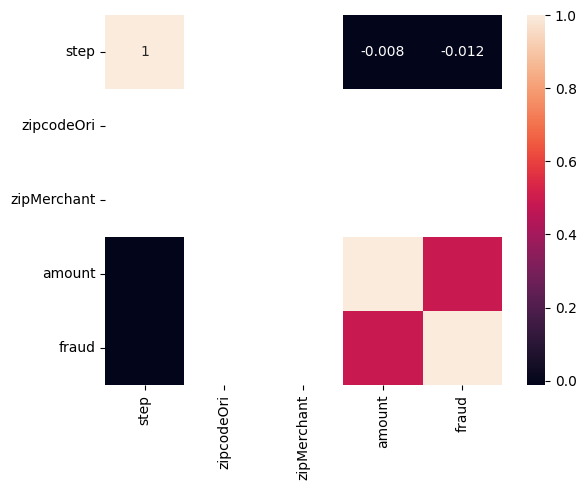

In [ ]:
sns.heatmap(corr,annot=True)

In [ ]:
df.drop(['zipcodeOri'], inplace=True, axis=1)
df

,step,customer,age,gender,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,28007,es_transportation,4.55,0
1,0,C352968107,2,M,M348934600,28007,es_transportation,39.68,0
2,0,C2054744914,4,F,M1823072687,28007,es_transportation,26.89,0
3,0,C1760612790,3,M,M348934600,28007,es_transportation,17.25,0
4,0,C757503768,5,M,M348934600,28007,es_transportation,35.72,0
...,...,...,...,...,...,...,...,...,...
594638,179,C1753498738,3,F,M1823072687,28007,es_transportation,20.53,0
594639,179,C650108285,4,F,M1823072687,28007,es_transportation,50.73,0
594640,179,C123623130,2,F,M349281107,28007,es_fashion,22.44,0
594641,179,C1499363341,5,M,M1823072687,28007,es_transportation,14.46,0


In [ ]:
df.drop(['zipMerchant'], inplace=True, axis=1)

In [ ]:
corr=df.corr()

<Axes: >

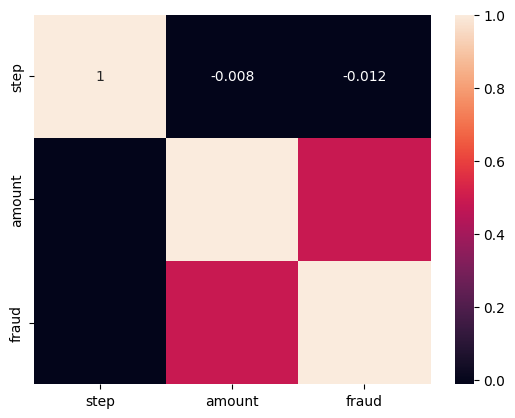

In [ ]:
sns.heatmap(corr,annot=True)

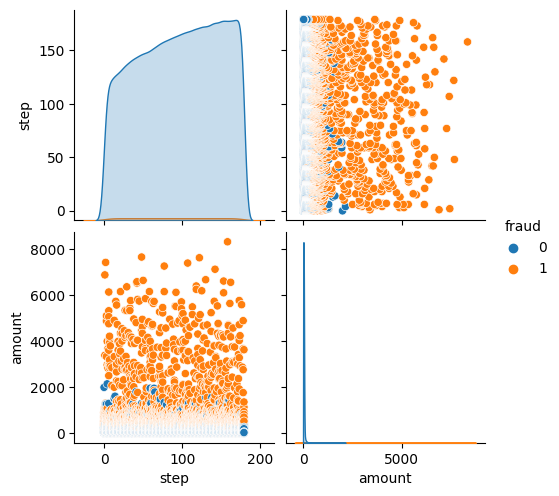

In [ ]:
sns.pairplot(df,hue='fraud')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0
2,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0
3,0,C1760612790,3,M,M348934600,es_transportation,17.25,0
4,0,C757503768,5,M,M348934600,es_transportation,35.72,0


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
df['customer_encoded'] = label_encoder.fit_transform(df['customer'])
df['category_encoded'] = label_encoder.fit_transform(df['category'])
df['merchant_encoded'] = label_encoder.fit_transform(df['merchant'])

In [ ]:
df.drop(['gender'], inplace=True, axis=1)
df.drop(['merchant'], inplace=True, axis=1)
df.drop(['customer'], inplace=True, axis=1)
df.drop(['category'], inplace=True, axis=1)

In [ ]:
df.head()

,step,age,amount,fraud,gender_encoded,customer_encoded,category_encoded,merchant_encoded
0,0,4,4.55,0,2,210,12,30
1,0,2,39.68,0,2,2753,12,30
2,0,4,26.89,0,1,2285,12,18
3,0,3,17.25,0,2,1650,12,30
4,0,5,35.72,0,2,3585,12,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   step              594643 non-null  int64  
 1   age               594643 non-null  object 
 2   amount            594643 non-null  float64
 3   fraud             594643 non-null  int64  
 4   gender_encoded    594643 non-null  int32  
 5   customer_encoded  594643 non-null  int32  
 6   category_encoded  594643 non-null  int32  
 7   merchant_encoded  594643 non-null  int32  
dtypes: float64(1), int32(4), int64(2), object(1)
memory usage: 27.2+ MB


In [ ]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [ ]:
df['age'].value_counts()

2.0    187310
3.0    147131
4.0    109025
5.0     62642
1.0     58131
6.0     26774
0.0      2452
Name: age, dtype: int64

In [ ]:
df['age']=df['age'].fillna(df['age'].median())

In [ ]:
df.isnull().sum()

step                0
age                 0
amount              0
fraud               0
gender_encoded      0
customer_encoded    0
category_encoded    0
merchant_encoded    0
dtype: int64

In [ ]:
X=df.drop(['fraud'],axis=1)
y=df['fraud']

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)


y_res = pd.Series(y_res)
print(y_res.value_counts())

0    587443
1    587443
Name: fraud, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

In [ ]:
X_train.shape ,X_test.shape ,y_train.shape,y_test.shape

((822420, 7), (352466, 7), (822420,), (352466,))

In [ ]:
X_train['age'].value_counts()

2.000000    193876
3.000000    140474
4.000000    103898
5.000000     56079
1.000000     50488
             ...  
1.659819         1
1.038574         1
1.783023         1
3.211036         1
3.615024         1
Name: age, Length: 255352, dtype: int64

In [ ]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42,verbose=1,class_weight="balanced")
gnb=GaussianNB()
gbc=GradientBoostingClassifier()
adc=AdaBoostClassifier()
xgb=XGBClassifier()

In [ ]:
for model in [dtc,rfc,gnb,gbc,adc,xgb]:
    print(model,'------------------------------------')
    abc=model.fit(X_train,y_train)
    Y_pred_train=abc.predict(X_train)
    Y_pred_test=abc.predict(X_test)
    As_train=accuracy_score(Y_pred_train,y_train)
    As_test=accuracy_score(Y_pred_test,y_test)
    cm = confusion_matrix(Y_pred_test, y_test)
    cr = classification_report(Y_pred_test, y_test)






    print("training Accuracy score \n", As_train)
    print("=========="*3)
    print("testing Accuracy score \n", As_test)
    print("=========="*3)
    print("Confusion matrix \n", cm)
    print("=========="*3)
    print("CLASSIFICATION REPORT \n", cr)
    print("=========="*3)

DecisionTreeClassifier() ------------------------------------
training Accuracy score 
 1.0
testing Accuracy score 
 0.9939483524652023
Confusion matrix 
 [[174858    758]
 [  1375 175475]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    175616
           1       1.00      0.99      0.99    176850

    accuracy                           0.99    352466
   macro avg       0.99      0.99      0.99    352466
weighted avg       0.99      0.99      0.99    352466

RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=42,
                       verbose=1) ------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.5s finished


training Accuracy score 
 0.9802667736679556
testing Accuracy score 
 0.980003745042075
Confusion matrix 
 [[170155    970]
 [  6078 175263]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    171125
           1       0.99      0.97      0.98    181341

    accuracy                           0.98    352466
   macro avg       0.98      0.98      0.98    352466
weighted avg       0.98      0.98      0.98    352466

GaussianNB() ------------------------------------
training Accuracy score 
 0.9136183458573478
testing Accuracy score 
 0.9131348839320672
Confusion matrix 
 [[163362  17746]
 [ 12871 158487]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91    181108
           1       0.90      0.92      0.91    171358

    accuracy                           0.91    352466
   macro avg       0.91      0.91      0.91    352466
weighted avg      

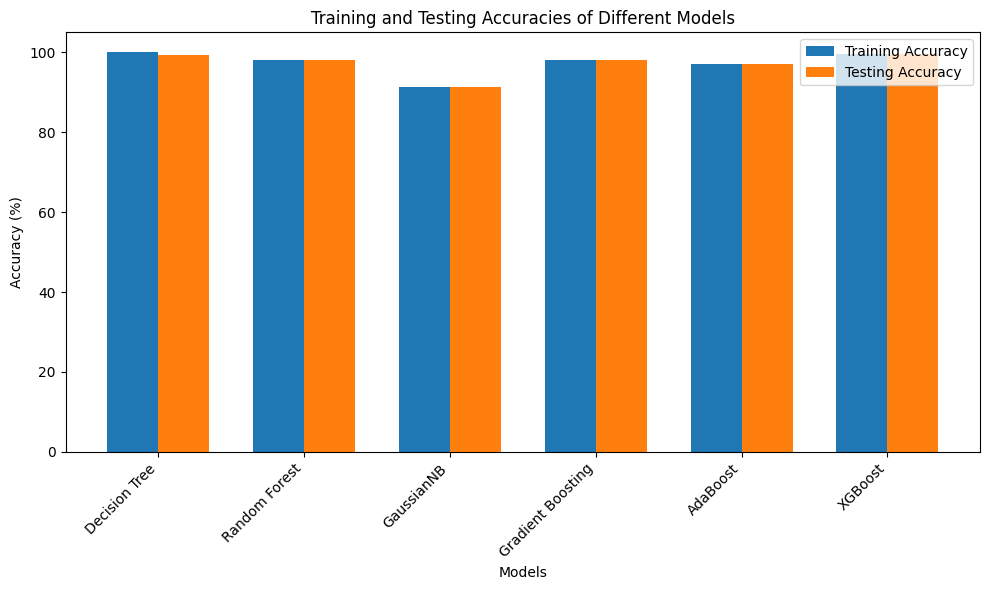

In [ ]:
model_names = ['Decision Tree', 'Random Forest', 'GaussianNB', 'Gradient Boosting', 'AdaBoost', 'XGBoost']
training_accuracies = [100.0, 98.03, 91.36, 98.14, 96.99, 99.69]
testing_accuracies = [99.40, 98.00, 91.31, 98.14, 97.02, 99.60]


ind = np.arange(len(model_names))


plt.figure(figsize=(10, 6))
width = 0.35

plt.bar(ind - width/2, training_accuracies, width, label='Training Accuracy')
plt.bar(ind + width/2, testing_accuracies, width, label='Testing Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracies of Different Models')
plt.xticks(ind, model_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()


plt.show()